In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:

!sudo apt install tesseract-ocr-ind

!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-ind tesseract-ocr-osd
0 upgraded, 4 newly installed, 0 to remove and 45 not upgraded.
Need to get 5,353 kB of archives.
After this operation, 16.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ind all 1:4.00~git30-7274cfa-1.1 [537 kB]
Fetched 5,353 kB in 0s (13.1 MB/s)
debconf: unable to init

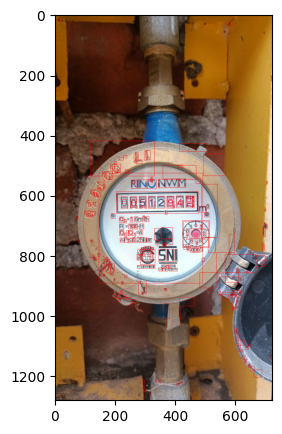

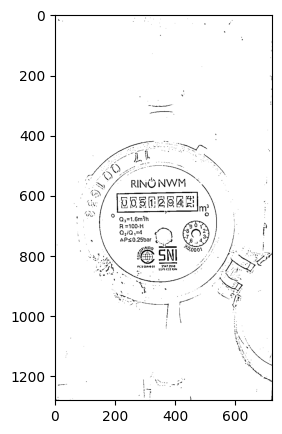

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

swm = cv2.imread("/content/drive/MyDrive/PCVK/Images/swm/meteran2.jpg")

# Mengaburkan gambar dengan Gaussian Blur
blurred_image = cv2.GaussianBlur(swm, (3,3), 0)

# Mengubah gambar menjadi grayscale
img_gray = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2GRAY)
# Melakukan equalization pada gambar grayscale
equalized_image = cv2.equalizeHist(img_gray)

block_size = 11
constant = 15
thresholded_image = cv2.adaptiveThreshold(
    img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, block_size, constant
) # Melakukan adaptive thresholding pada gambar grayscale

# Membuat kernel berukuran 2x1 untuk operasi morfologi
kernel = np.ones((2, 1), np.uint8)
# Melakukan operasi erosi pada gambar yang telah di threshold
morph_image = cv2.erode(thresholded_image,  kernel, iterations=1)

# Find contours in the closed image
contours, hierarchy = cv2.findContours(morph_image, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

contour_image = swm.copy()
for cnt in contours: # Untuk setiap kontur yang ditemukan
    x, y, w, h = cv2.boundingRect(cnt) # Mendapatkan koordinat dan ukuran bounding box

    ras = format(w / h, '.2f') # Menghitung rasio antara lebar dan tinggi bounding box

    if h >= 8 and w >= 4 and float(ras) <= 4: # Jika tinggi >= 8, lebar >= 4, dan rasio <= 4

      # Membuat rectangle pada gambar asli dengan koordinat dan ukuran dari bounding box
      cv2.rectangle(swm, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

# Mengubah gambar menjadi RGB
contour_image = cv2.cvtColor(swm, cv2.COLOR_BGR2RGB)
# Mengubah gambar hasil erosi menjadi RGB
opened_image = cv2.cvtColor(morph_image, cv2.COLOR_GRAY2RGB)
# Mengubah gambar hasil thresholding menjadi RGB
thresholded_image = cv2.cvtColor(thresholded_image, cv2.COLOR_GRAY2RGB)

# Menampilkan gambar hasil deteksi kontur
plt.figure(figsize=(10,5))
plt.imshow(contour_image)

# Menampilkan gambar hasil deteksi kontur
plt.figure(figsize=(10,5))
plt.imshow(thresholded_image)

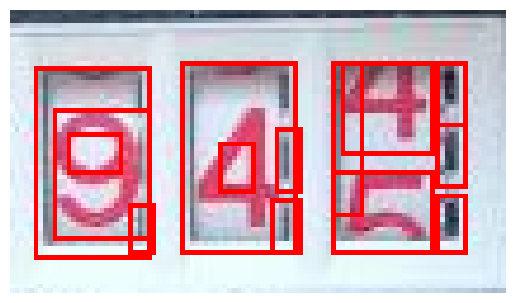

debit air:  4



In [ ]:
import cv2
import pytesseract

cropped_image = swm[590:650, 365:470]

plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Konversi gambar ke dalam format grayscale
gray_nik = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)

# Contoh praproses: peningkatan kontras
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
preprocessed_nik = clahe.apply(gray_nik)

# Praproses morfologi (closing)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
morphed_nik = cv2.morphologyEx(preprocessed_nik, cv2.MORPH_CLOSE, kernel)

# Praproses segmentasi teks menggunakan threshold dinamis
_, threshold_nik = cv2.threshold(morphed_nik, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Contoh segmentasi teks menggunakan pytesseract
custom_config = r'--oem 3 --psm 6 outputbase digits'
dbt_text = pytesseract.image_to_string(threshold_nik, config=custom_config)

# Tampilkan hasil pengenalan NIK
print("debit air: ", dbt_text)